In [2]:
import itertools
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context(rc = {'patch.linewidth': 0.0})
pd.set_option('display.max_rows', None)

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [4]:
colors_10 = sns.color_palette("colorblind", 10)
plt.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


In [5]:
def create_key_from_path(path):
    path = path.split(".")[0] # drop file extension
    path = path.split("_")
    compiler = path[1]
    if compiler == "circ":
        test_case = path[2]
        input_size = path[3].split('-')[-1]
        num_partitions = path[4].split('-')[-1]
        mutation_level = path[5].split('-')[-1]
        mutation_step_size = path[6].split('-')[-1]
        cost_model = path[7].split('-')[-1]
        return (compiler, test_case, input_size, num_partitions, mutation_level, mutation_step_size, cost_model)
    elif compiler == "hycc":
        test_case = path[2]
        input_size = path[3].split('-')[-1]
        minimization_time = path[4].split('-')[-1]
        cost_model = path[5].split('-')[-1]
        return (compiler, test_case, input_size, minimization_time, cost_model)
    else:
        raise ValueError('Unknown compiler: {}'.format(compiler))

In [6]:
def permute(*args):
    return list(itertools.product(*args))

In [7]:
# import all csvs as panda dataframes
csv_dir_path = "../csvs4"
csv_paths = os.listdir(csv_dir_path)
circ_df = pd.DataFrame()
hycc_df = pd.DataFrame()

for csv_path in sorted(csv_paths):
    key = create_key_from_path(csv_path)
    full_path = "{}/{}".format(csv_dir_path, csv_path)
    df = pd.read_csv(full_path)
    if key[0] == "circ":
        circ_df = df.append(circ_df, ignore_index=True)
    elif key[0] == "hycc":
        hycc_df = df.append(hycc_df, ignore_index=True)
    
circ_df = circ_df.drop(['Unnamed: 0'], axis=1)
hycc_df = hycc_df.drop(['Unnamed: 0'], axis=1)

In [8]:
for c in list(circ_df.columns):
    print(c)

selection_scheme
test_case
input_size
num_parts
mutation_level
mutation_step_size
run
cost_model
ilp_cost
op_cost
conv_cost
compile_time
server_exec_time
server_load_time
server_total_time
client_exec_time
client_load_time
client_total_time
num_nodes
avg_partition_size
ilp_time
comb_time
part_time


In [9]:
circ_df.head()

,selection_scheme,test_case,input_size,num_parts,mutation_level,mutation_step_size,run,cost_model,ilp_cost,op_cost,...,server_load_time,server_total_time,client_exec_time,client_load_time,client_total_time,num_nodes,avg_partition_size,ilp_time,comb_time,part_time
0,b,biomatch,512,8,4,4,0,hycc,8365771.264,8365771.264,...,1.97003,9.12419,7.21908,1.90403,9.12311,8708.0,1088.0,0.0,0.0,0.0
1,b,biomatch,512,8,4,4,1,hycc,8365771.264,8365771.264,...,1.98580,9.16436,7.20097,1.96244,9.16340,8708.0,1088.0,0.0,0.0,0.0
2,b,biomatch,512,8,4,4,2,hycc,8365771.264,8365771.264,...,2.60874,9.52761,6.98226,2.54295,9.52521,8708.0,1088.0,0.0,0.0,0.0
3,y,biomatch,512,8,4,4,0,hycc,2292952.064,2292952.064,...,1.68761,5.47584,3.79660,1.68300,5.47960,8708.0,1088.0,0.0,0.0,0.0
4,y,biomatch,512,8,4,4,1,hycc,2292952.064,2292952.064,...,1.70719,5.46867,3.79226,1.68572,5.47798,8708.0,1088.0,0.0,0.0,0.0


In [10]:
circ_df.shape

(3600, 23)

In [11]:
for c in list(hycc_df.columns):
    print(c)

test_case
minimization_time
input_size
cost_model
variant
module_bundle_time
selection_time
runner
run
server_load_time
server_exec_time
client_load_time
client_exec_time
selection_scheme


In [12]:
hycc_df.head()

,test_case,minimization_time,input_size,cost_model,variant,module_bundle_time,selection_time,runner,run,server_load_time,server_exec_time,client_load_time,client_exec_time,selection_scheme
0,biomatch,60,512,hycc,NaN,0.0,0.0,CIRCUIT-SIM,0,4.88471,12.24710,NaN,NaN,NaN
1,biomatch,60,512,hycc,NaN,0.0,0.0,CIRCUIT-SIM,1,4.87187,12.22290,NaN,NaN,NaN
2,biomatch,60,512,hycc,NaN,0.0,0.0,ABY-HYCC,2,4.89250,12.19300,NaN,NaN,NaN
3,biomatch,60,512,hycc,NaN,0.0,0.0,ABY-HYCC,0,20.40980,2.82690,21.0542,2.17742,NaN
4,biomatch,60,512,hycc,NaN,0.0,0.0,ABY-HYCC,1,20.88110,2.45968,20.3063,3.03128,NaN


In [13]:
hycc_df.shape

(336, 14)

In [14]:
# Compile time

In [15]:
# Execution Time 
# x-axis -- input size
# y-axis -- execution time 

# iterate by selection_scheme, input_size, num_parts, mutation_level, mutation_step_size

In [16]:
unique_selection_schemes = list(circ_df.selection_scheme.unique())
unique_input_size = list(circ_df.input_size.unique())
unique_num_parts = list(circ_df.num_parts.unique())
unique_mutation_level = list(circ_df.mutation_level.unique())
unique_mutation_step_size = list(circ_df.mutation_step_size.unique())

print("unique_selection_schemes: {}".format(unique_selection_schemes))
print("unique_input_size: {}".format(unique_input_size))
print("unique_num_parts: {}".format(unique_num_parts))
print("unique_mutation_level: {}".format(unique_mutation_level))
print("unique_mutation_step_size: {}".format(unique_mutation_step_size))

unique_selection_schemes: ['b', 'y', 'a+b', 'a+y', 'greedy', 'lp', 'lp+nm', 'glp']
unique_input_size: [512, 4096, 256, 2048, 1024]
unique_num_parts: [8, 4, 16, 12]
unique_mutation_level: [4, 2, 1]
unique_mutation_step_size: [4, 2, 1]


In [17]:
# Execution time by selection_scheme

In [18]:
def plot_by_selection_scheme(df, system, permutation_keys, permutations, key, order):
    for perm in permutations:
        tf = df.copy()
        title = system
        for i, perm_key in enumerate(permutation_keys):
            tf = tf[tf[perm_key] == perm[i]]
            title += "_{}-{}".format(perm_key, perm[i])
    
        gby = tf.groupby(["selection_scheme"])[key]

        # order data
        x_axis = [x[0] for x in gby]
        y_axis = [np.average(y[1]) for y in gby]
        data = list(zip(x_axis, y_axis))
        order = {v: i for i, v in enumerate(order)}
        data = sorted(data, key=lambda x: order[x[0]])
        x_axis = [x[0] for x in data]
        y_axis = [y[1] for y in data]

        # plot data
        plt.bar(x_axis, y_axis)
        plt.xlabel("selection_scheme")
        plt.ylabel(key)
        plt.title(title)
        plt.show()

In [19]:
permutation_keys = ["input_size", "num_parts", "mutation_level", "mutation_step_size"]
permutations = permute(unique_input_size, unique_num_parts, unique_mutation_level, unique_mutation_step_size)

In [20]:
# key = "compile_time"
# plot_by_selection_scheme(circ_df, "circ", permutation_keys, permutations, key, unique_selection_schemes)

In [21]:
# key = "server_exec_time"
# plot_by_selection_scheme(circ_df, "circ", permutation_keys, permutations, key, unique_selection_schemes)

In [22]:
# key = "client_exec_time"
# plot_by_selection_scheme(circ_df, "circ", permutation_keys, permutations, key, unique_selection_schemes)

In [23]:
def plot_by_selection_scheme_and_input_size(df, system, permutation_keys, permutations, key):    
    avg_tfs = []
    for perm in permutations:
        tf = df.copy()
        schemes = df.selection_scheme.unique()
                
        # filter by permutation 
        title = system
        for i, perm_key in enumerate(permutation_keys):
            tf = tf[tf[perm_key] == perm[i]]
            title += "_{}-{}".format(perm_key, perm[i])
        
        # average metric across all 3 runs
        avg_key = "avg_{}".format(key)
        tf[avg_key] = tf.apply(lambda x: np.average(tf[(tf["selection_scheme"] == x.selection_scheme) & (tf["input_size"] == x.input_size)][key]), axis=1)
        tf = tf.drop_duplicates(subset=["selection_scheme", "input_size", avg_key], keep="last")
        
        # sort 
        tf = tf.sort_values(by=["input_size"])
        
        dfs = []
        for s in schemes:
            dfs.append(tf[tf.selection_scheme == s])
        
        x = np.arange(len(tf.input_size.unique()))
        width = 0.1
        fig, ax = plt.subplots()
        for i, f in enumerate(dfs):
            values = list(f[avg_key])
            if values:
                ax.bar(x - (len(schemes) - 1) * width / 2 + width * i, values, width, label=schemes[i])
            
        ax.set_ylabel(key)
        ax.set_title(title)
        ax.set_xticks(x, tf.input_size.unique())
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=len(schemes))
        plt.show()
        

# CirC 

In [24]:
unique_selection_schemes = list(circ_df.selection_scheme.unique())
unique_input_size = list(circ_df.input_size.unique())
unique_num_parts = list(circ_df.num_parts.unique())
unique_mutation_level = list(circ_df.mutation_level.unique())
unique_mutation_step_size = list(circ_df.mutation_step_size.unique())

permutation_keys = ["num_parts", "mutation_level", "mutation_step_size"]
permutations = permute(unique_num_parts, unique_mutation_level, unique_mutation_step_size)

In [25]:
# plot execution time by selection_scheme and input_size 

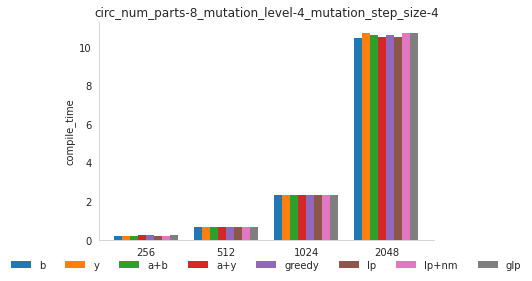

In [26]:
# What is the compile time as we scale out the benchmark?

key = "compile_time"
plot_by_selection_scheme_and_input_size(circ_df, "circ", permutation_keys, [permutations[0]], key)

The recorded compile times are before pulling in Alex's newest changes. We expect this number to drop drastically!

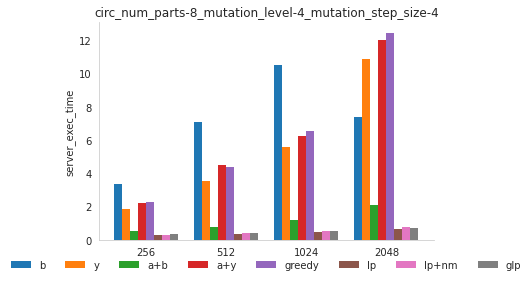

In [27]:
# What is the server execution time as we scale out the benchmark?

key = "server_exec_time"
plot_by_selection_scheme_and_input_size(circ_df, "circ", permutation_keys, [permutations[0]], key)


# Timeout -- 30 sec, b case might have timedout -- data point is 0. 

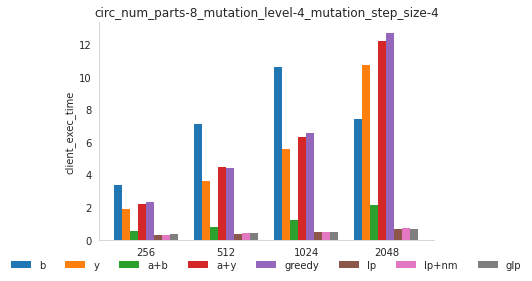

In [28]:
# What is the client execution time as we scale out the benchmark?

key = "client_exec_time"
plot_by_selection_scheme_and_input_size(circ_df, "circ", permutation_keys, [permutations[0]], key)

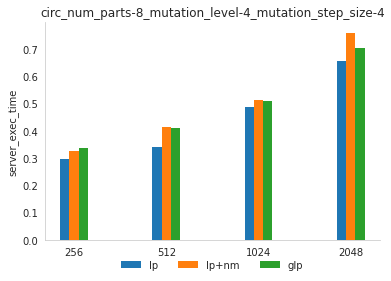

In [29]:
# close up on ILP execution time

key = "server_exec_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, [permutations[0]], key)

In [30]:
# this looks fishy... why is GLP slower than LP?

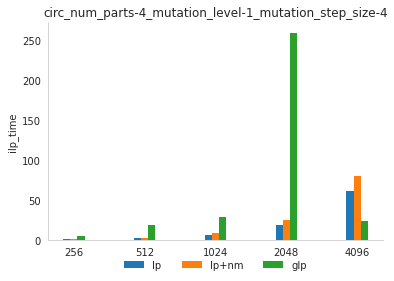

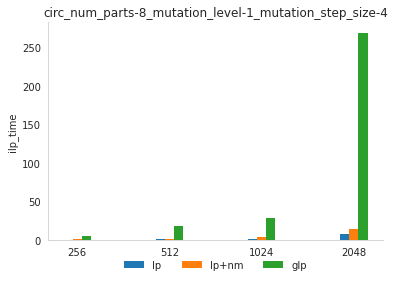

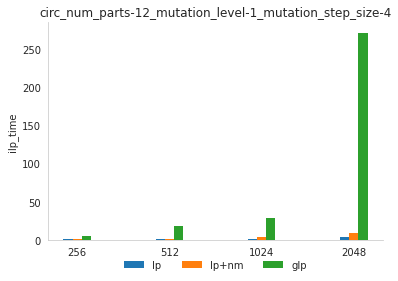

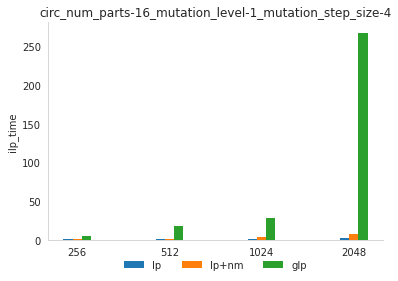

In [33]:
# How does the number of partitions affect the ilp solving time?
perms = [
    (4, 1, 4),
    (8, 1, 4),
    (12, 1, 4),
    (16, 1, 4),
]

key = "ilp_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, perms, key)

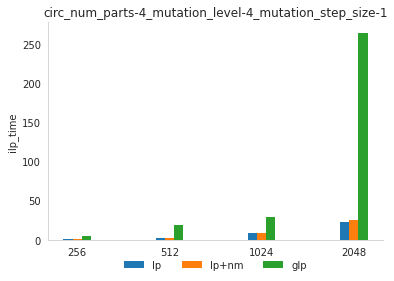

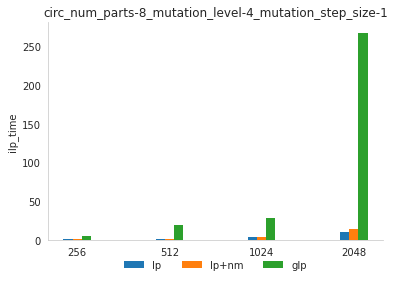

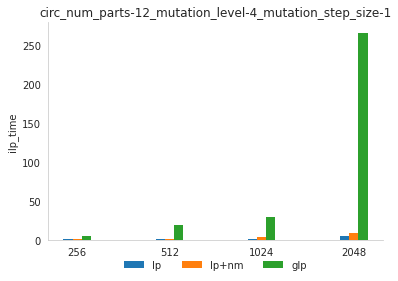

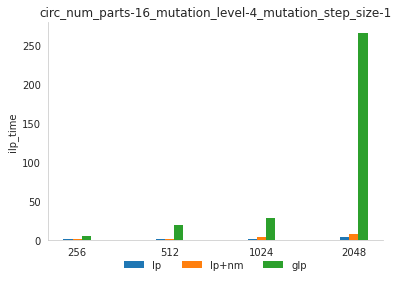

In [31]:
# How does the number of partitions affect the ilp solving time?
perms = [
    (4, 4, 1),
    (8, 4, 1),
    (12, 4, 1),
    (16, 4, 1),
]

key = "ilp_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, perms, key)

Increasing the number of partitions drops the ILP solving time (due to multithreading!) 

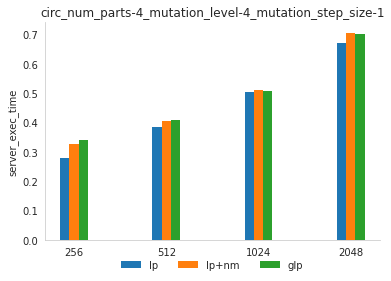

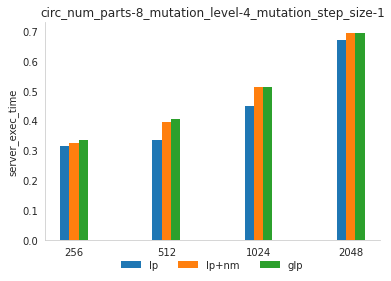

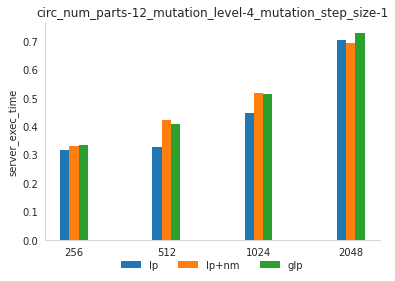

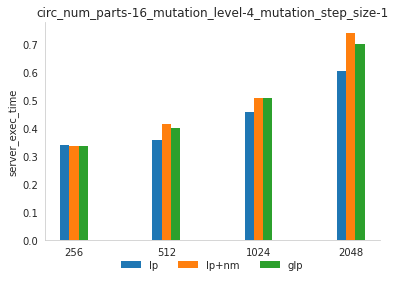

In [405]:
# How does the number of partitions affect the server exec time?
perms = [
    (4, 4, 1),
    (8, 4, 1),
    (12, 4, 1),
    (16, 4, 1),
]

key = "server_exec_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, perms, key)

In the last case, we see that using more partitions decreases the server execution time for the lp selection scheme compared to glp. However, the range is only within 0.1 seconds. It would be helpful to test this on larger input sizes / more complex problems, and try to answer the question of "what is the optimal number of paritions to use?" and "At what point does the number of partitions start to degrade?". 

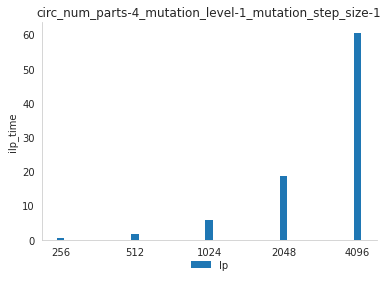

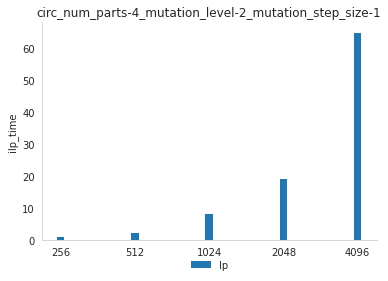

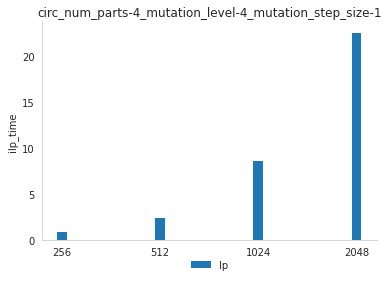

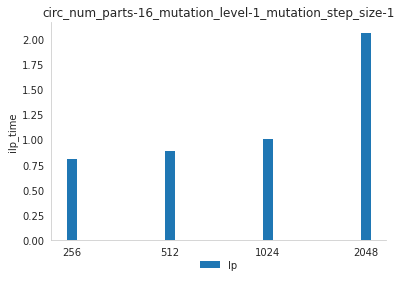

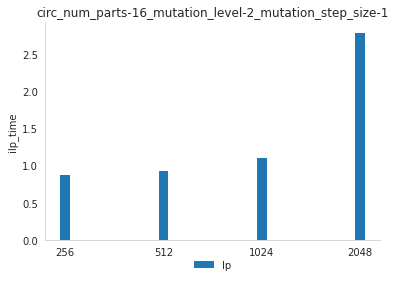

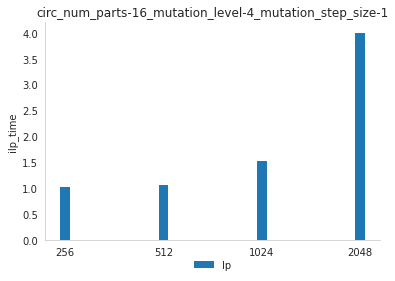

In [406]:
# How does the mutation level affect the ilp solving time?
perms = [
    (4, 1, 1),
    (4, 2, 1),
    (4, 4, 1),
    (16, 1, 1),
    (16, 2, 1),
    (16, 4, 1),
]
key = "ilp_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"] == "lp"], "circ", permutation_keys, perms, key)

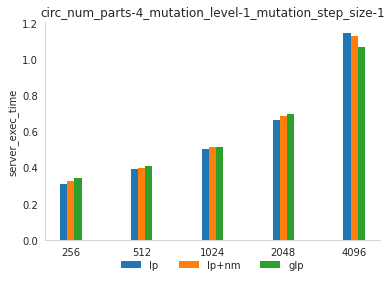

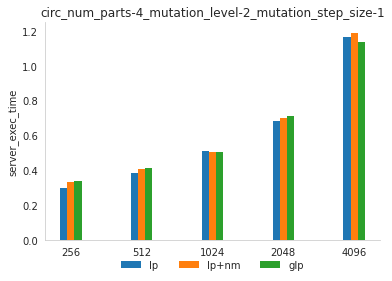

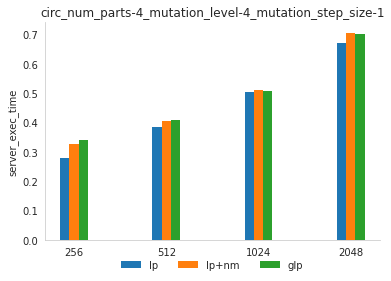

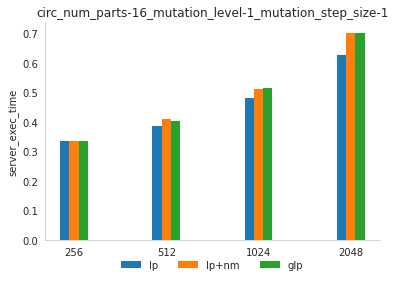

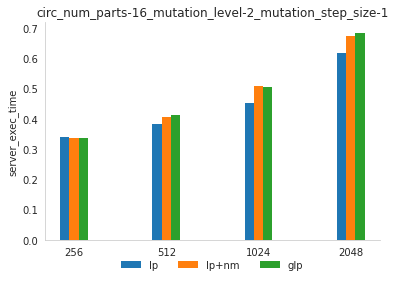

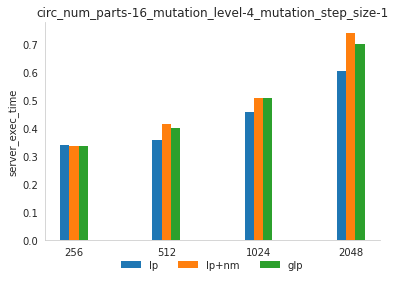

In [407]:
# How does the mutation level affect the server execution time?
perms = [
    (4, 1, 1),
    (4, 2, 1),
    (4, 4, 1),
    (16, 1, 1),
    (16, 2, 1),
    (16, 4, 1),
]
key = "server_exec_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, perms, key)

In the 4-1-1 case, the server execution time of lp is slower compared to glp. I suspect this is because the mutation level is only 1, which may not influence protocol assignments within a partition a lot compared to a higher mutation level. 

As the mutation level is higher, the partition is able to see more information outside of its own partition to help influence it's protocol assignments.

TODO: compare share maps here!! 

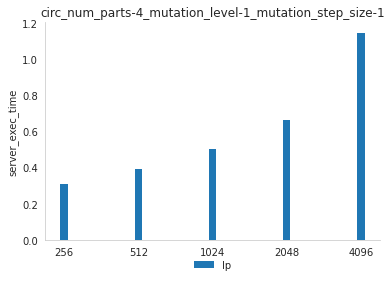

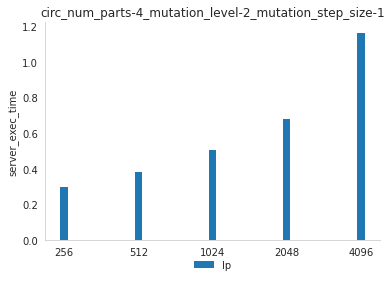

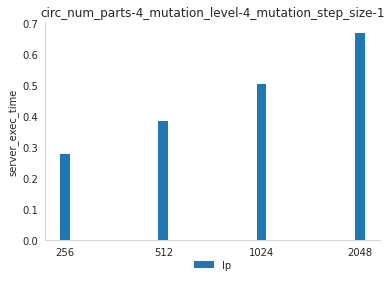

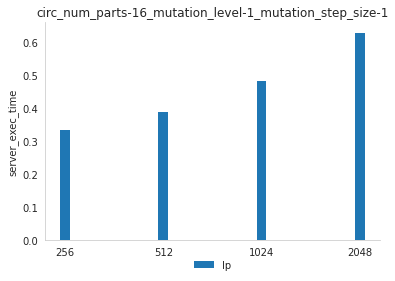

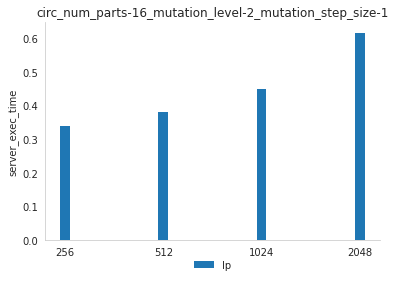

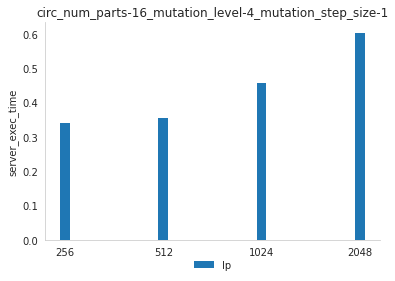

In [409]:
# close up of lp server execution time 
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"] == "lp"], "circ", permutation_keys, perms, key)

There doesn't seem to be any major outliers using different mutation sizes. I think it would be better to test even greater mutation levels (maybe 25 or 50 levels out). The differences in protocol selection using 1 - 4 doesn't seem to have any difference on the server execution time. 

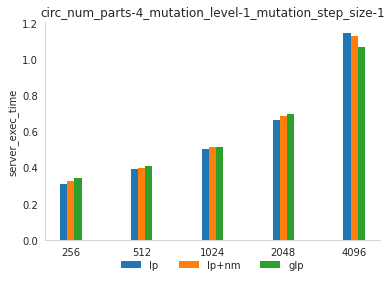

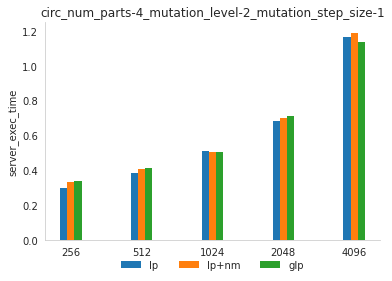

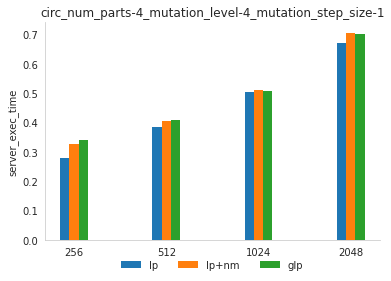

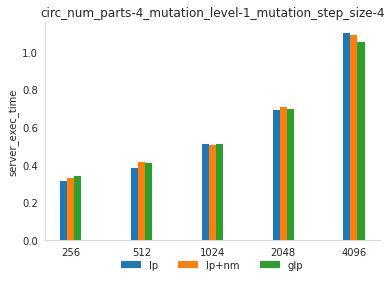

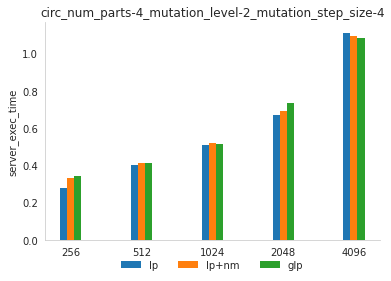

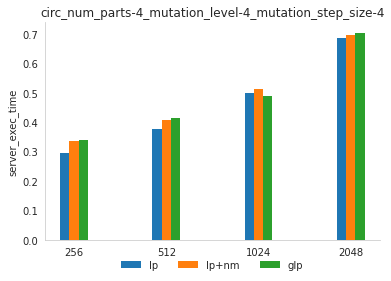

In [34]:
# How does the mutation step size affect the server execution time?
perms = [
    (4, 1, 1),
    (4, 2, 1),
    (4, 4, 1),
    (4, 1, 4),
    (4, 2, 4),
    (4, 4, 4),
]
key = "server_exec_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, perms, key)

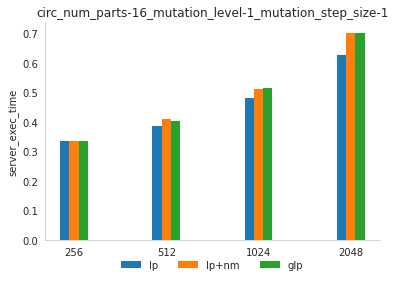

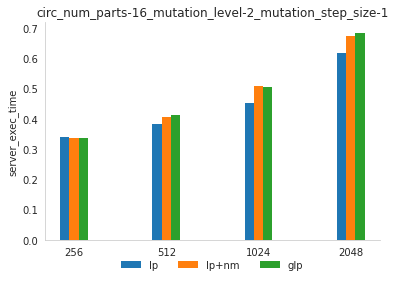

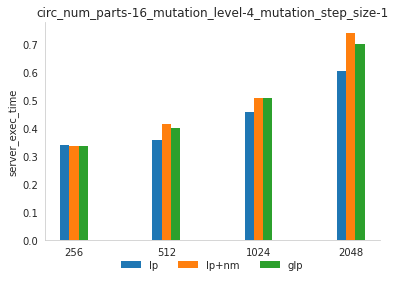

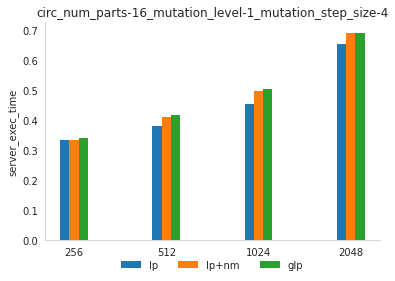

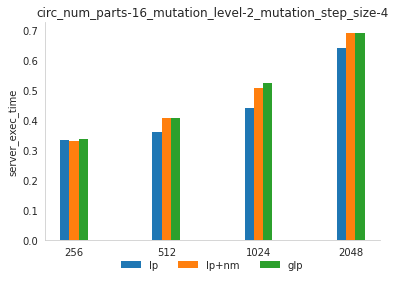

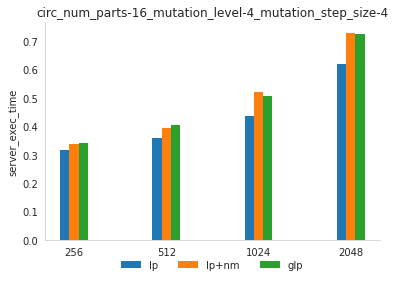

In [35]:
# How does the mutation step size affect the server execution time?
perms = [
    (16, 1, 1),
    (16, 2, 1),
    (16, 4, 1),
    (16, 1, 4),
    (16, 2, 4),
    (16, 4, 4),
]
key = "server_exec_time"
plot_by_selection_scheme_and_input_size(circ_df[circ_df["selection_scheme"].str.contains("lp")], "circ", permutation_keys, perms, key)

In [430]:
# What configuration had the smallest server_exec_time for each input size?

circ_best_configurations = []

for input_size in sorted(circ_df["input_size"].unique()):
    df = circ_df[(circ_df["input_size"] == input_size) & (circ_df.server_exec_time > 0)]
    df = df[df.server_exec_time == df.server_exec_time.min()] 
    print(input_size)
    print(list(df.selection_scheme)[0], end=" ")
    print(list(df.num_parts)[0], end=" ")
    print(list(df.mutation_level)[0], end=" ")
    print(list(df.mutation_step_size)[0])
    print()
    
    circ_best_configurations.append(df)

256
lp 4 2 4

512
lp 8 2 4

1024
lp 12 2 2

2048
lp 16 4 1

4096
lp 4 1 4



In [431]:
circ_df[circ_df["input_size"] == 2048][["selection_scheme", "server_exec_time"]]

,selection_scheme,server_exec_time
1872,b,0.000000
1873,b,0.000000
1874,b,22.167100
1875,y,11.130500
1876,y,10.650500
1877,y,10.913800
1878,a+b,2.198450
1879,a+b,2.009770
1880,a+b,2.039200
1881,a+y,12.060400


# HyCC

In [354]:
hycc_df.columns

Index(['test_case', 'minimization_time', 'input_size', 'cost_model', 'variant',
       'module_bundle_time', 'selection_time', 'runner', 'run',
       'server_load_time', 'server_exec_time', 'client_load_time',
       'client_exec_time', 'selection_scheme'],
      dtype='object')

In [355]:
unique_selection_schemes = list(hycc_df.selection_scheme.unique())
unique_input_size = list(hycc_df.input_size.unique())
unique_minimization_time = list(hycc_df.minimization_time.unique())
permutation_keys = ["minimization_time"]
permutations = sorted(permute(unique_minimization_time))

In [356]:
hycc_df.columns

Index(['test_case', 'minimization_time', 'input_size', 'cost_model', 'variant',
       'module_bundle_time', 'selection_time', 'runner', 'run',
       'server_load_time', 'server_exec_time', 'client_load_time',
       'client_exec_time', 'selection_scheme'],
      dtype='object')

In [360]:
# What is HyCC compile time based on minimization time?

key = "compile_time"
plot_by_selection_scheme_and_input_size(hycc_df, "hycc", permutation_keys, permutations, key)

KeyError: 'compile_time'

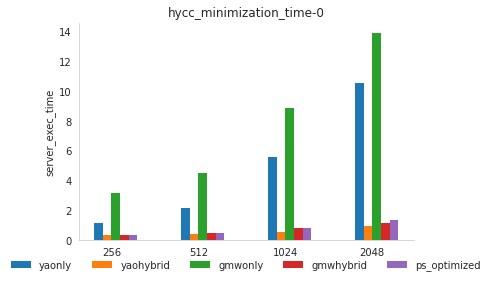

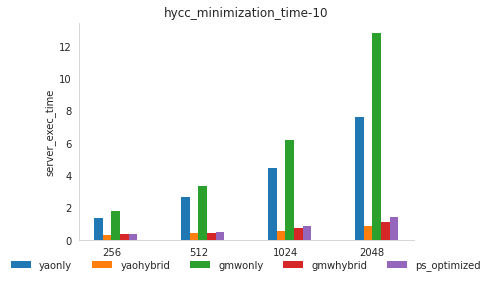

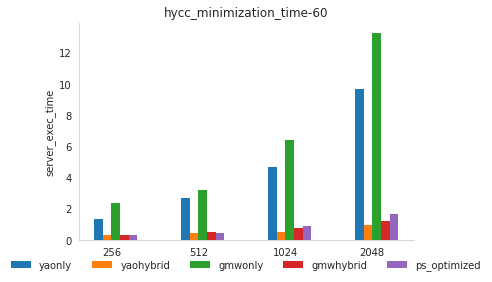

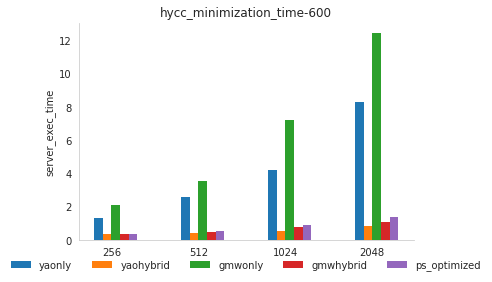

In [358]:
# What is HyCC execution time based on minimization time?
key = "server_exec_time"
plot_by_selection_scheme_and_input_size(hycc_df, "hycc", permutation_keys, permutations, key)

In [432]:
# find best minimization time and scheme for hycc tests by input size
hycc_best_configurations = []
for input_size in sorted(hycc_df["input_size"].unique()):
    df = hycc_df[hycc_df["input_size"] == input_size]
    df = df[df.server_exec_time == df.server_exec_time.min()] 
    print(input_size)
    print(list(df.selection_scheme)[0], end=" ")
    print(list(df.minimization_time)[0])
    print()
    
    hycc_best_configurations.append(df)

256
yaohybrid 60

512
yaohybrid 60

1024
yaohybrid 600

2048
yaohybrid 600



[256, 512, 1024, 2048]


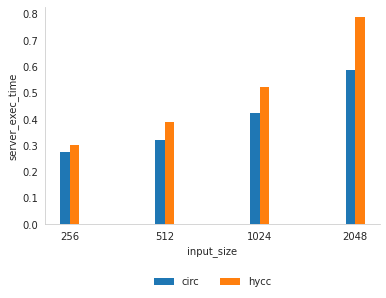

In [442]:
circ_values = []
hycc_values = []

for df in circ_best_configurations:
    circ_values.append(list(df["server_exec_time"])[0])

for df in hycc_best_configurations:
    hycc_values.append(list(df["server_exec_time"])[0])

key = "server_exec_time"
labels = sorted(hycc_df.input_size.unique())[:len(hycc_best_configurations)]
print(labels)
x = np.arange(len(hycc_best_configurations))
width = 0.1

fig, ax = plt.subplots()
ax.bar(x - width / 2, circ_values[:len(hycc_best_configurations)], width, label="circ")
ax.bar(x + width / 2, hycc_values, width, label="hycc")

ax.set_xlabel("input_size")
ax.set_ylabel(key)
ax.set_xticks(x, labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, ncol=2)
plt.show()
    

For circ, the best selection_scheme (surprisingly) is "lp". And for HyCC, the best selection_scheme is "yaohybrid". 

In all cases, circ's execution time is faster than HyCC, and the difference in execution times grows as the test case scales to larger input sizes.

More testing needs to be done in order to check what are the optimal parameters for circ's mutation heuristic. 

In [437]:
# print best configurations
for df in circ_best_configurations:
    print("circ", end=" ")
    print(list(df.input_size)[0], end= " ")
    print(list(df.selection_scheme)[0], end=" ")
    print(list(df.num_parts)[0], end=" ")
    print(list(df.mutation_level)[0], end=" ")
    print(list(df.mutation_step_size)[0])

print()

for df in hycc_best_configurations:
    print("hycc", end=" ")
    print(list(df.input_size)[0], end= " ")
    print(list(df.selection_scheme)[0], end=" ")
    print(list(df.minimization_time)[0])
    

circ 256 lp 4 2 4
circ 512 lp 8 2 4
circ 1024 lp 12 2 2
circ 2048 lp 16 4 1
circ 4096 lp 4 1 4

hycc 256 yaohybrid 60
hycc 512 yaohybrid 60
hycc 1024 yaohybrid 600
hycc 2048 yaohybrid 600


In [ ]:
# Compile time

In [ ]:
# Execution Time 
# x-axis -- input size
# y-axis -- execution time 

# iterate by selection_scheme, input_size, num_parts, mutation_level, mutation_step_size

In [ ]:
# ILP Solving Time by partitions

In [ ]:
# OP cost & Conv cost by Execution time 